In [57]:
def remove_parentheses(ss):
    ss = np.array(ss)
    for i in range(ss.size):
        s = ss[i].split('(')
        s = s[0]
        if s[-1]==' ':
            s = s[:-1]
        ss[i] = s
    return ss

In [ ]:
import numpy as np
import pandas as pd
def bootstrap(x, n_boot):
    n = x.shape[0]
    mean = np.array([np.nanmean(x,axis=0)])
    for i in range(n_boot-1):
        inds = np.random.choice(np.arange(n), size=n, replace=True)
        xs = x[inds,:]
        mean = np.append(mean, np.array([np.nanmean(xs,axis=0)]), axis=0)
    return np.median(mean,axis=0), np.percentile(mean, 2.5, axis=0), np.percentile(mean, 97.5, axis=0)

# Loading data

In [66]:
# Visualizes the location visit durations across different demographic (e.g., emplotyment) and mental health (e.g. depression)
# groups

import pickle
import os
import numpy as np
import pandas as pd

folders = os.listdir('data/')
loc_all_subject = [[] for i in range(len(folders))]
loc_all = []
for (i,fol) in enumerate(folders):
    subfolders = os.listdir('data/'+fol)
    for subf in subfolders:
        file_eml = 'data/'+fol+'/'+subf+'/eml.csv'
        if os.path.exists(file_eml):
            df = pd.read_csv(file_eml, sep='\t', header=None)
            loc = df.loc[0,6][2:-2]
            if not('", "' in loc) and loc!='' and loc!='Vehicle':
                if loc[-1]==' ':
                    loc = loc[:-1]
                loc = loc.title()
                if "'" in loc:
                    ind = loc.find("'")
                    loc_temp = ''
                    for (j,l) in enumerate(loc):
                        if j==ind+1:
                            loc_temp += l.lower()
                        else:
                            loc_temp += l
                    loc = loc_temp
                loc_all_subject[i].append(loc)
                loc_all.append(loc)
            
loc_uniq_subject = [[] for i in range(len(loc_all_subject))]
for i in range(len(loc_all_subject)):
    loc_uniq_subject[i] = np.unique(loc_all_subject[i])
    
loc_uniq = np.unique(loc_all)

# Overall Distribution

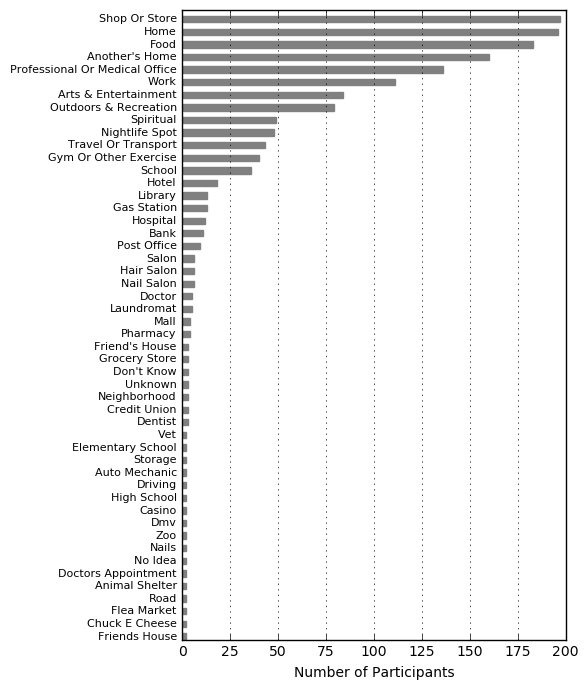

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 50

loc_freq = np.zeros(loc_uniq.size)
for i in range(loc_uniq.size):
    for j in range(len(loc_uniq_subject)):
        if loc_uniq[i] in loc_uniq_subject[j]:
            loc_freq[i] += 1

ind_sort = np.argsort(loc_freq)
loc_uniq = loc_uniq[ind_sort]
loc_freq = loc_freq[ind_sort]

plt.figure(figsize=[6,7])
plt.barh(np.arange(n), loc_freq[-n:], height=.5, color=(.5,.5,.5), edgecolor=(.5,.5,.5))
plt.yticks(np.arange(n)+.25, remove_parentheses(loc_uniq[-n:]), fontsize=8);
plt.xticks(np.arange(0,201,25))
plt.xlabel('Number of Participants')
plt.axes().xaxis.grid()
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.tight_layout()
plt.savefig('distribution.png',format='png',dpi=200, pad_inches=0)

In [41]:
len('asdasd')

6